![Concrete Wallpaper](./assets/concrete_img.jpg)

<h1 style="text-align: center; font-size: 1.75rem; font-weight: 500; margin: 1.5rem 0 1rem;">Prediciting Concrete Compressive Strength based on Concrete Composition</h1>
<h2 style="text-align: center; font-size: 1rem; font-weight: 500; margin: 0 0 2rem;">Decision Tree Regressor</h2>

This project aims to develop a machine learning model that uses **Decision Tree Regressor** to predict the compressive strength of concrete mixtures. The model will be trained on data containing the composition (amounts of various components) and age of concrete samples, alongside their corresponding measured compressive strength values.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

df = pd.read_csv("./datasets/concrete_comp_strength_analysis.csv")
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.768036


<div style="margin: 1.25rem 0;">‎ </div>

<h1 style="background-color: #a07fb3; color: white; padding: 0.75rem;">> Modeling the Problem to be Solved</h1>

This project focuses on predicting **concrete compressive strength**, a crucial mechanical property of concrete,  using supervised regression machine learning. Compressive strength refers to the maximum stress that concrete can withstand before failure under compression. By analyzing the relationship between the composition of a concrete mix (including components like cement, water, and aggregates) and its age, a model can be trained to estimate the compressive strength without the need for extensive physical testing. The reasoning behind the selection of each feature, such as cement content and water content, is explained further in the "Feature Engineering" section below.

![Concrete Building Image](./assets/concrete_img3.jpeg)

<div style="margin: 1.25rem 0;">‎ </div>

<h1 style="text-align: center;">Exploratory Data Analysis (EDA)</h1>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Structural Analysis of the Dataset</h3>
The given dataset contains a total of 1030 rows (datapoints) and 9 columns (variables). Each column in the dataset represents a datatype of 'float64' which means that we are solely dealing with numerical data. With this, no further data encoding is needed in the project's feature engineering section.

In [9]:
df.shape

(1030, 9)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   float64
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(9)
memory usage: 72.6 KB


<h3 style="padding: 0.5rem; background-color: #513d5c; color: white">Checking for Null Values</h3>
The given dataset does not have any null values in any of the data points. Therefore, no further data manipulation is needed to be performed.

In [12]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Statistical Analysis of the Dataset</h3>
To progress in the EDA, we need to analyze the different statistical values that correspond to the given dataset. In this case, here are the key points needed to be analyzed:

* **Standard Deviation** - The standard deviation indicates the spread of the datapoint values from a single variable. Based on the tabular statistics below, the data indicates that there is **relatively high value spread** in the columns: 'cement', 'blast_furnace_slag', 'fly_ash', 'coarse_aggregate', 'fine_aggregate', and 'age'. Furthermore, higher value spread might indicate possible **outliers** in the dataset.
<br><br>
* **Range** - The range signifies the minimum and maximum values present in a specific datapoint variable. In this case, it is worth noting the range of the concrete_compressive_strength (target variable) which is 2.331808 to 82.599225.

In [14]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Univariate Analysis 📊</h2>

Given the great values of the standard deviation of each datapoint variable, we should analyze the **presence of outliers** in certain columns in the dataset. Using boxplot visualization, we can effectively determine if outliers are present among the datapoints in reference to each variable.

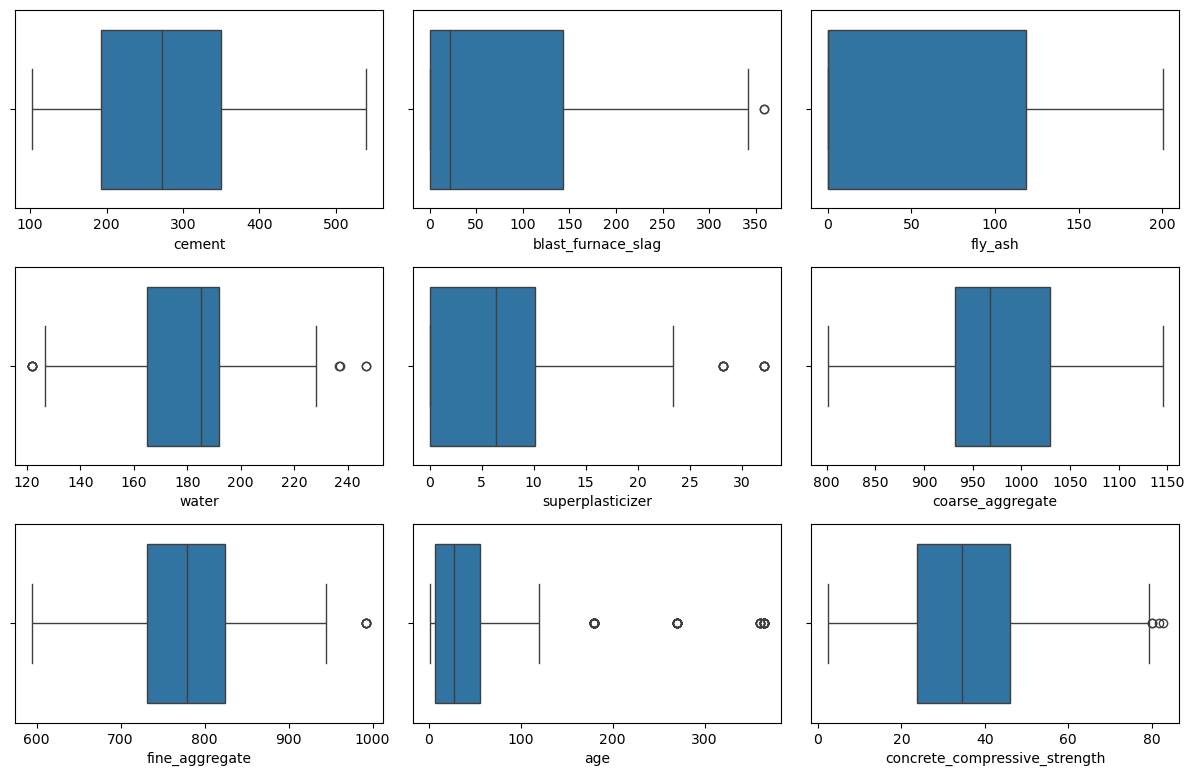

In [17]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
fig = plt.figure(figsize=(12,10))

for i in range(len(num_feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df,x=df[num_feature[i]])

plt.tight_layout()
plt.show()

<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem;">> Removal of Outliers</h3>

The boxplot visualization gives us a one-dimensional (univariate) overview of how the datapoint values are distributed in its given range. Given that most datapoints will fall under or near a certain mean value, there are cases where some datapoints might possess values that fall out of this range. These are **outliers**. Outliers have the possibility to skew the results of the model training, therefore it is key to take a look at them in these early stages of the EDA.

In the previous boxplot visualizations, the outliers are represented by the black-colored circles that lie outside the span of the boxplot. In this case, these diamond figures were found in the following variables from the dataset:
* Blast Furnace Slag
* Water
* Superplasticizer
* Fine Aggregate
* Age
* Concrete Compressive Strength

Furthermore, it is essential to also count the number of outliers present among the datapoints. In this case, I chose to use the **Interquartile Range Method** of determining the total number of outliers for each variable.

#### Outliers - Blast Furnace Slag

In [20]:
data = df["blast_furnace_slag"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count the existing outliers
outliers = 0
for point in data:
  if point < lower_threshold or point > upper_threshold:
    outliers += 1

print("Number of outliers:", outliers)

# Removal of outliers
df = df[(df["blast_furnace_slag"] >= lower_threshold) & (df["blast_furnace_slag"] <= upper_threshold)]

Number of outliers: 2


#### Outliers - Water

In [22]:
data = df["water"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count the existing outliers
outliers = 0
for point in data:
  if point < lower_threshold or point > upper_threshold:
    outliers += 1

print("Number of outliers:", outliers)

# Removal of outliers
df = df[(df["water"] >= lower_threshold) & (df["water"] <= upper_threshold)]

Number of outliers: 9


#### Outliers - Concrete Compressive Strength

In [24]:
data = df["concrete_compressive_strength"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Count the existing outliers
outliers = 0
for point in data:
  if point < lower_threshold or point > upper_threshold:
    outliers += 1

print("Number of outliers:", outliers)

# Removal of outliers
df = df[(df["concrete_compressive_strength"] >= lower_threshold) & (df["concrete_compressive_strength"] <= upper_threshold)]

Number of outliers: 3


<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Bivariate Analysis 📊</h2>
<h3 style="background-color: #a07fb3; color: white; padding: 0.5rem; margin: 2rem 0;">> Analysis of the Non-Linear Relationship of the Dependent and Independent Variables</h3>

The Concrete Compressive Strength (CCS) discernibly exhibits a **non-linear relationship** with its corresponding independent variables. This is evident from the following "scatter plot" visualizations of the correlation of CCS to the different columns existing in the dataset. To further explain this, the following are the detailed observations from each scatter plot instance:

* For every independent variable, datapoints visibly have **great spread**.
* The value of the target variable is NOT reliant on the value of a single feature.
* As the value of the independent variable increases, the value of the CCS (target variable) can increase, decrease, or stagnate.
* The absence of certain independent variables (e.g., blast_furnace_slag, fly_ash), meaning that even if their value is 0, the CCS can still increase, possibly reaching the upper range boundary.

These observations greatly indicate that there is a NON-LINEAR relationship between the independent variables and the target variable, CCS.

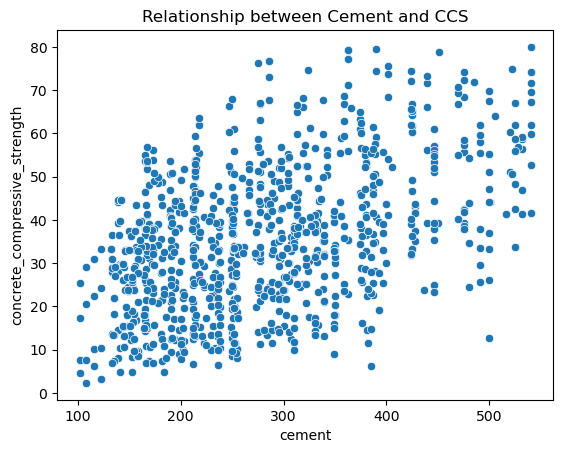

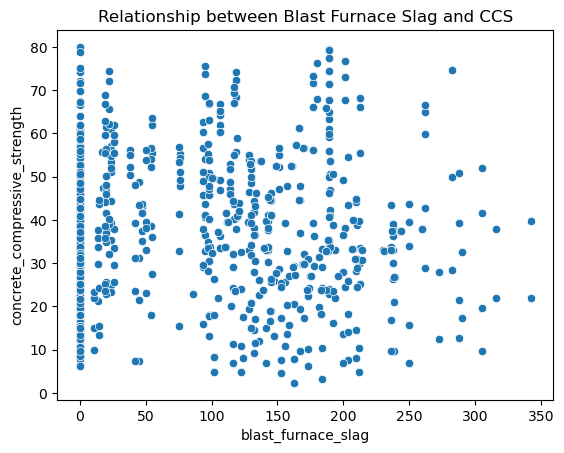

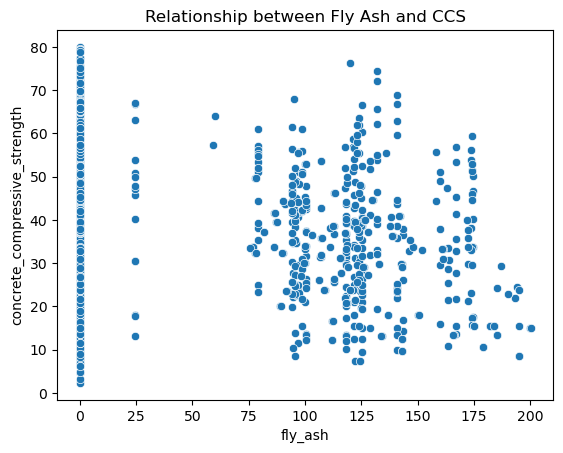

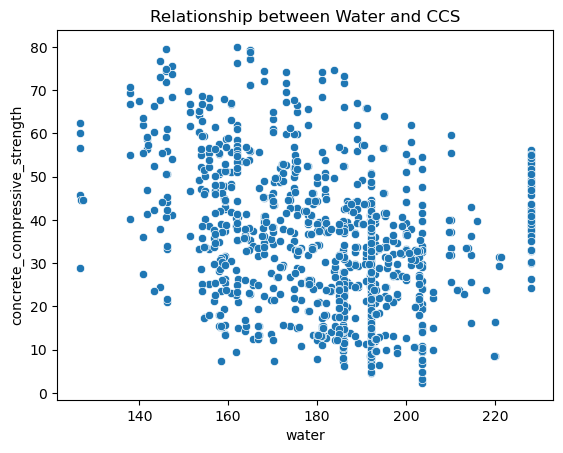

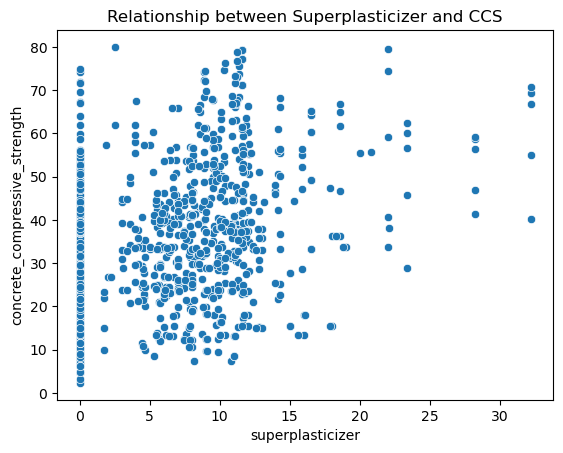

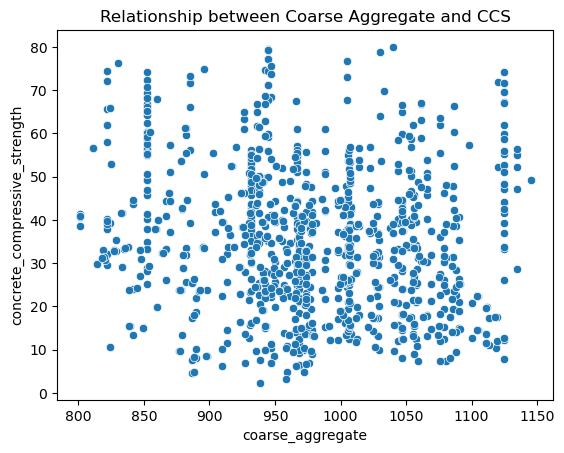

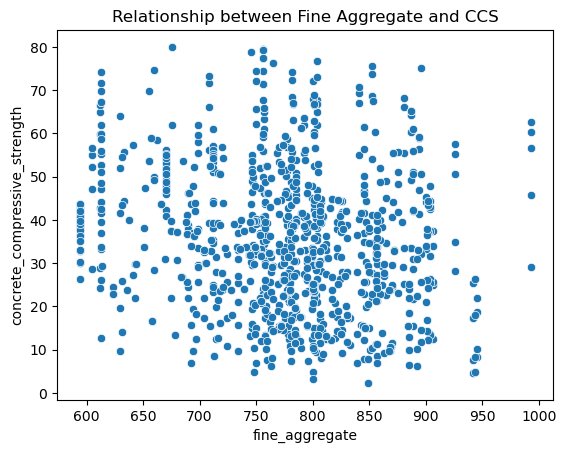

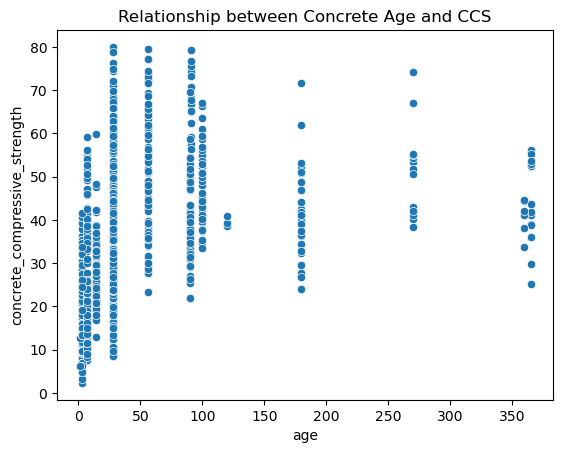

In [27]:
# CEMENT VS CCS
sns.scatterplot(x="cement", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Cement and CCS")
plt.show()

# BLAST FURNACE SLAG VS CCS
sns.scatterplot(x="blast_furnace_slag", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Blast Furnace Slag and CCS")
plt.show()

# FLY ASH VS CCS
sns.scatterplot(x="fly_ash", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Fly Ash and CCS")
plt.show()

# WATER VS CCS
sns.scatterplot(x="water", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Water and CCS")
plt.show()

# SUPERPLASTICIZER VS CCS
sns.scatterplot(x="superplasticizer", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Superplasticizer and CCS")
plt.show()

# COARSE AGGREGATE VS CCS
sns.scatterplot(x="coarse_aggregate", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Coarse Aggregate and CCS")
plt.show()

# FINE AGGREGATE VS CCS
sns.scatterplot(x="fine_aggregate", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Fine Aggregate and CCS")
plt.show()

# CONCRETE AGE VS CCS
sns.scatterplot(x="age", y="concrete_compressive_strength", data=df)
plt.title("Relationship between Concrete Age and CCS")
plt.show()

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Multivariate Analysis 📊</h2>

The heatmap visualization below indicates the cross mapping of variables in terms of the their corresponding degree of correlation. In this case, we should only take a look at the **right most column** which indicates the correlation of each independent feature/variable to the CCS.

Based on the heatmap, certain features have **moderate/great correlation** to the target variable. These are:
* Cement
* Water
* Superplasticizer
* Age

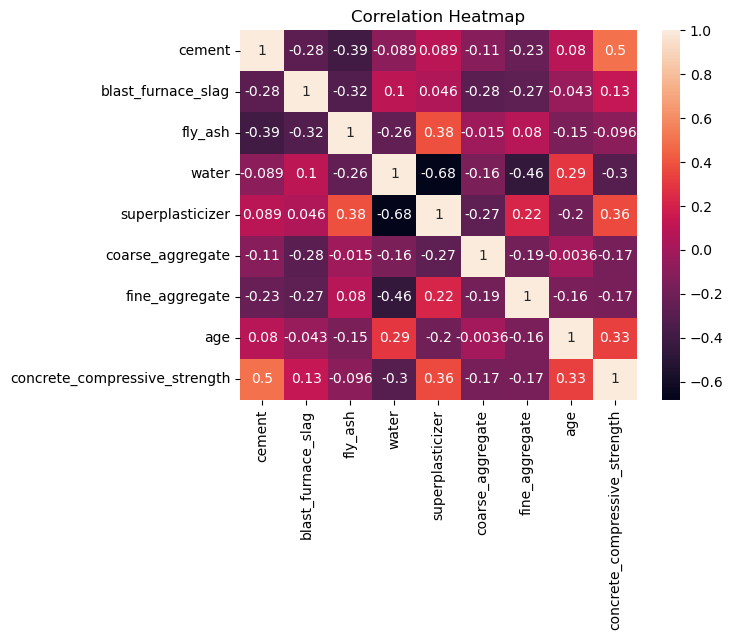

In [30]:
correlation_matrix = df.corr()

# Creating a correlation heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

<br><br><center><font size = 6.5><b>Feature Engineering</b></font></center>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Selection</h2>
From the provided structure of the obtained dataset, the necessary features for predicting the CCS are already present! Therefore, the only process to be done is "feature selection" among the existing columns in the dataset. In this case, based on the previous efforts in Bivariate and Multivariate Analysis, it is right to assume that **all of the existing features can be included** in the building of the project's machine learning model.

* **Cement ($kg/m^{3}$)** - Cement is the primary binding material in concrete. Its content directly influences the formation of the hydration products that give concrete its strength. A higher cement content generally leads to higher compressive strength, up to a certain point.

* **Blast Furnace Slag ($kg/m^{3}$)** - Blast furnace slag, a by-product of iron production, can partially replace cement in concrete mixes. It can contribute to strength development, although typically to a lesser extent than cement. The optimal amount of slag for strength depends on the specific type and other mix components.

* **Fly Ash ($kg/m^{3}$)** - Fly ash, a byproduct of coal combustion, can have a complex influence on strength. In some cases, it can act as a pozzolanic material, reacting with calcium hydroxide from cement hydration to form additional strength-contributing compounds. However, fly ash can also slow down early-age strength development. The impact on strength depends on the fly ash type, amount, and mix design.

* **Water ($kg/m^{3}$)** - Water is necessary for hydration but excess water weakens the concrete matrix. A higher water-to-cement ratio (w/c ratio) leads to a higher porosity and lower compressive strength. Finding the optimal water content for proper hydration while minimizing the w/c ratio is crucial for achieving high strength.

* **Cement ($kg/m^{3}$)** - Cement is the primary binding material in concrete. Its content directly influences the formation of the hydration products that give concrete its strength. A higher cement content generally leads to higher compressive strength, up to a certain point.

* **Superplasticizer ($kg/m^{3}$)** - Superplasticizers improve the workability of concrete by reducing the water needed for a given workability level. This allows for a lower w/c ratio and potentially higher compressive strength. However, superplasticizers themselves don't directly contribute to strength.

* **Coarse Aggregate ($kg/m^{3}$)** - Coarse aggregates (gravel, crushed stone) form the main skeletal structure of concrete. Their size, shape, and packing density influence the strength and other properties. A well-graded aggregate blend can improve strength by reducing voids and creating a denser concrete matrix.

* **Fine Aggregate ($kg/m^{3}$)** - Fine aggregates (sand) fill the voids between coarse aggregates and contribute to the overall density of the concrete matrix. The amount and type of fine aggregate can influence strength, but to a lesser extent than coarse aggregates. A well-proportioned mix design considering both coarse and fine aggregates is important.

* **Age (days)** - Concrete strength development is a time-dependent process. Hydration continues over time, leading to increased strength. This correlation is typically positive in the early stages (weeks to months). However, strength gains slow down and eventually plateau with longer curing times.

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Feature Scaling</h2>
It is also important to scale the datapoint values of each feature in this case because of their varying value ranges. Please refer to df.describe() listed previously to see the corresponding statistics of the dataset.

In [34]:
X = df.drop(columns=["concrete_compressive_strength"])
y = df["concrete_compressive_strength"]

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<br><br><center><font size = 6.5><b>Model Training (Decision Tree Regressor)</b></font></center>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Splitting the data into training and testing sets</h2>

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Building the Decision Tree Model</h2>

In [39]:
dtr = DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Comparison of the Actual and Predicted Values</h2>

In [41]:
test_df = pd.DataFrame(y_test.values)
pred_df = pd.DataFrame(y_pred)

test_pred_df = pd.concat([test_df, pred_df], axis=1, ignore_index=True)
test_pred_df.columns = ["y_test", "y_pred"]
test_pred_df

,y_test,y_pred
0,6.267337,14.699628
1,35.754255,38.610656
2,31.536632,34.703051
3,23.524232,23.518026
4,33.053479,31.026420
...,...,...
199,44.133359,44.091990
200,41.051401,40.398553
201,13.520624,12.541568
202,38.210760,36.899721


The DataFrame displayed above shows the comparison between the actual data and predicted data of the Decision Tree model. It shows that in most data mapping instances, the model was able to **closely predict** the actual value of the target variable (CCS).

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Evaluation</h2>

In [44]:
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)

print(f"MSE value: {dt_mse}")
print(f"RMSE value: {dt_rmse}")

dt_r2 = r2_score(y_test,y_pred)
print(f"R2 Score value: {dt_r2}")

MSE value: 30.61426570226735
RMSE value: 5.533015968011239
R2 Score value: 0.8729335443515595


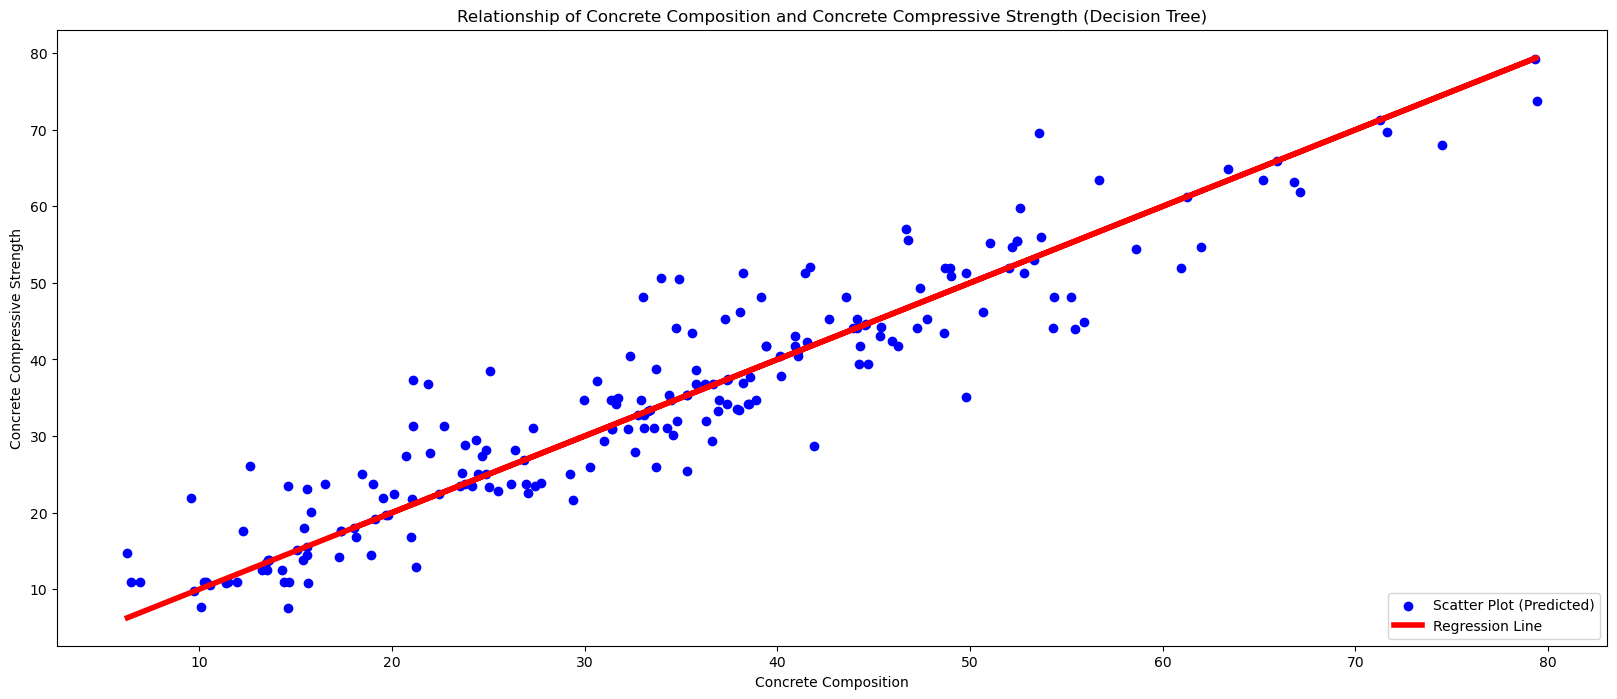

In [45]:
plt.figure(figsize=(20,8))
plt.scatter(y_test, y_pred, color="blue", label="Scatter Plot (Predicted)")
plt.plot(y_test, y_test, color="red", linewidth=4, label="Regression Line")

plt.legend(loc=4)
plt.title("Relationship of Concrete Composition and Concrete Compressive Strength (Decision Tree)")
plt.xlabel("Concrete Composition")
plt.ylabel("Concrete Compressive Strength")

plt.show()

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">Checking for Overfitting and Underfitting</h2>

In [47]:
print(f"Training set score: {dtr.score(X_train, y_train)}")
print(f"Testing set score: {dtr.score(X_test, y_test)}")

Training set score: 0.9763452598156698
Testing set score: 0.8729335443515595


Based on the comparison of the training and testing set scores, it indicates that the training set score is **greater** than the testing set score. This is an indication of **OVERFITTING**.

<div style="margin: 0.1rem 0;">‎ </div>

<h2 style="padding: 0.5rem; background-color: #513d5c; color: white;">K-Folds Cross Validation</h2>

The decision tree regressor model has signs of overfitting. In order to get a better overview of the model's performance, we can perform **k-folds cross validation**. With this, we can provide a more accurate assessment of the model’s performance compared to a single train-test split. By averaging results over multiple folds, you get a better estimate of how the model will perform on unseen data.

In [51]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(dtr, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation R² scores for each fold
print(f"Cross-Validation Scores: {cv_scores}")

# Print the average score across all folds
print(f"Average Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.81387365 0.79523066 0.80774761 0.84759793 0.81676303]
Average Cross-Validation Score: 0.8162425773741045


<div style="margin: 0.1rem 0;">‎ </div>

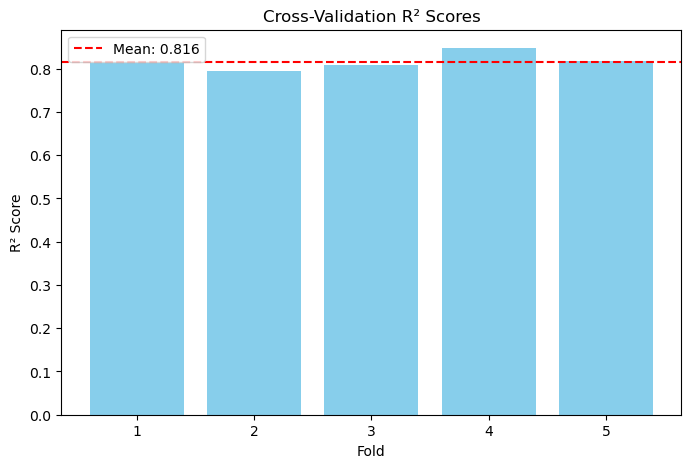

In [53]:
# Visualize the cross-validation scores using a bar plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
plt.title('Cross-Validation R² Scores')
plt.xlabel('Fold')
plt.ylabel('R² Score')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.show()

<br><br><center><font size = 6.5><b>Results and Recommendations</b></font></center>

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Fit Evaluation (MSE, RMSE, R2)</h3>

* **Mean Squared Error (MSE): 30.6143**<br>
The MSE value indicates the average squared difference between the predicted and actual values. A lower MSE suggests better model performance, as it reflects less error in predictions. In this case, an MSE of 30.6143 suggests that the squared deviations from the true values are moderate, and while it's necessary to assess this value relative to the target variable's range, it indicates some level of prediction error.

* **Root Mean Squared Error (RMSE): 5.5330**<br>
The RMSE is the square root of the MSE and provides an error metric in the same units as the target variable. An RMSE of 5.533 indicates that, on average, the model's predictions deviate from the actual values by approximately 5.53 units. This value should be interpreted in the context of the scale of the target variable to gauge the significance of the prediction error.

* **R-squared Score (R²): 0.8729**<br>
The R² score represents the proportion of variance in the target variable explained by the model. An R² value of 0.8729 means that approximately 87.29% of the variance in the target variable can be explained by the model. This strong score indicates that the model captures a substantial amount of the variability in the data, suggesting effective predictive capability.

Overall, the model exhibits good predictive performance, with a moderate MSE and RMSE suggesting some prediction error, and a high R² score indicating that a significant proportion of variance is explained. These results suggest that the model is reasonably well-fitted to the data, making it potentially suitable for practical applications. Further validation through techniques like cross-validation or comparisons with alternative models could provide additional insights into its effectiveness.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Model Score</h3>

* **Training Set Score: 0.9763**<br>
The training set score of 0.9763 indicates that approximately 97.63% of the variance in the target variable is explained by the model when evaluated on the training data. This high score suggests that the model fits the training data exceptionally well, capturing almost all of the underlying patterns.

* **Testing Set Score: 0.729**<br>
The testing set score of 0.8729 shows that about 87.29% of the variance in the target variable is explained by the model when evaluated on unseen data. While this score is still quite strong, it is significantly lower than the training score, which may indicate potential overfitting. This means the model performs well on the training data but does not generalize as effectively to new data.

The difference between the training and testing scores suggests that the model may be **overfitting**, capturing noise in the training data rather than generalizable patterns. While the model demonstrates strong predictive capabilities on the training set, the lower testing score highlights the need for further validation and potentially adjusting model complexity through techniques such as regularization, pruning, or using ensemble methods to improve generalization to unseen data.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Cross Validation Results</h3>

* **Average Cross-Validation Score: 0.8162**<br>
The average cross-validation score of 0.8162 indicates that, on average, the model explains about 81.62% of the variance in the target variable across the different folds. This score reflects the model's overall performance and suggests that it generalizes reasonably well to unseen data.

<br>The cross-validation results indicate a **consistent level of predictive performance**, with an average score suggesting that the model captures a substantial portion of the variability in the target variable. The range of scores also highlights some variability in model performance across different subsets of data, which could prompt further investigation into potential factors affecting performance, such as feature importance or the presence of outliers. Overall, these results support the model's robustness, but additional validation or tuning may further enhance its effectiveness.

<h3 style="padding: 0.5rem; background-color: #513d5c; color: white;">Recommendations</h3>

* **Nature of Decision Trees to Overfit**<br><br>By nature, Decision Tree models are known to be prone to overfitting. Therefore, implementing ensemble techniques can significantly enhance the model's performance and increase its generalizability on new, unseen data. For instance, ensemble techniques like **Random Forests** and **Gradient Boosting** combine multiple decision trees to create a more robust model. Random Forests reduce overfitting by averaging the predictions of many trees trained on different subsets of the data, while Gradient Boosting builds trees sequentially, optimizing for errors made by previous trees. These ensemble methods not only improve predictive accuracy but also enhance generalization to unseen data, making them effective solutions for recommendation tasks.